In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing dataset
import pandas as pd
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/project_data.csv', encoding = 'ISO-8859-1')
df.head()

,Velocity,Voltage,Current,Q,T1,T2,T3,T4,T5,T6,Ts,Ta,A,h
0,2.0,60,0.7,42,36,51,50,53,55,39,47.33,23,0.000531,32.509677
1,2.0,60,0.7,42,36,52,51,53,55,39,47.67,23,0.000531,32.061632
2,2.0,60,0.7,42,37,52,52,54,56,41,48.67,23,0.000531,30.812639
3,2.0,60,0.7,42,37,53,52,54,57,40,48.83,23,0.000531,30.621775
4,2.0,60,0.7,42,36,53,53,55,59,41,49.50,23,0.000531,29.847564


In [ ]:
#creating dataframe of variables with high correlation with output variable
data = df[['Q','Ts','h']]

In [ ]:
#x - independent variables, y - dependent variable
x=data.iloc[:,0:2].values
y=data.iloc[:,-1].values

In [ ]:
#splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle= False)


**Linear Regresison Model**


In [ ]:
model1 = LinearRegression().fit(x_train,y_train)
model1.predict(x)
print(model1.score(x_test,y_test))


0.8531820781080436


In [ ]:
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))

Train Accuracy: 0.9382384556561477
Test Accuracy: 0.8531820781080436


In [ ]:
data['pred_lr'] = model1.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


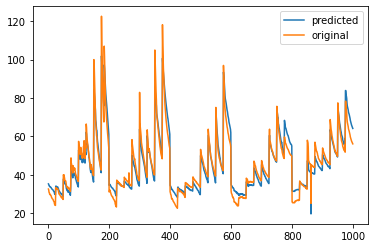

In [ ]:
plt.plot(data['pred_lr'], label = 'predicted')
plt.plot(df['h'], label = 'original')
plt.legend(loc="upper right")

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, data['pred_lr']))

Mean Absolute Error: 3.2897537944379454


**Desision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state= 0)
model_dt.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9594424696697461


In [ ]:
data['y_pred_dt'] = model_dt.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, data['y_pred_dt']))

Mean Absolute Error: 0.2599693819319321


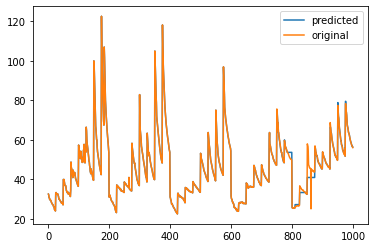

In [ ]:
plt.plot(data['y_pred_dt'], label = 'predicted')
plt.plot(df['h'], label = 'original')
plt.legend(loc="upper right")

**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
svr_mod = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_mod.fit(x_train, y_train)
print(svr_mod.score(x_test,y_test))

0.8339035130295649


In [ ]:
print("Train Accuracy:",svr_mod.score(x_train, y_train))
print("Test Accuracy:",svr_mod.score(x_test, y_test))

Train Accuracy: 0.9309842183462742
Test Accuracy: 0.8339035130295649


In [ ]:
data['y_pred_svr'] = svr_mod.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, data['y_pred_svr']))

Mean Absolute Error: 3.1900360855131247


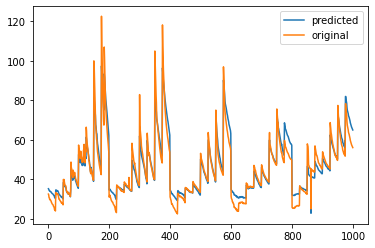

In [ ]:
plt.plot(data['y_pred_svr'], label = 'predicted')
plt.plot(df['h'], label = 'original')
plt.legend(loc="upper right")

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(criterion = 'mse', n_estimators = 500, random_state = 0)
rf_reg.fit(x_train,y_train)
print(rf_reg.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.9056515419902459


In [ ]:
print("Train Accuracy:",rf_reg.score(x_train, y_train))
print("Test Accuracy:",rf_reg.score(x_test, y_test))

Train Accuracy: 0.9996769554541398
Test Accuracy: 0.9056515419902459


In [ ]:
data['y_pred_rf'] = rf_reg.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, data['y_pred_rf']))

Mean Absolute Error: 0.4901416723287366


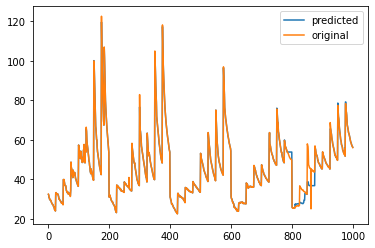

In [ ]:
plt.plot(data['y_pred_rf'], label = 'predicted')
plt.plot(df['h'], label = 'original')
plt.legend(loc="upper right")

In [ ]:
model_dt.predict([[320,117]])

array([64.11026966])